In [1]:
from IPython.display import HTML
HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')

# Problem statement

This case is about a bank (Thera Bank) which has a growing customer base. Majority of these customers are liability customers (depositors) with varying size of deposits. The number of customers who are also borrowers (asset customers) is quite small, and the bank is interested in expanding this base rapidly to bring in more loan business and in the process, earn more through the interest on loans. In particular, the management wants to explore ways of converting its liability customers to personal loan customers (while retaining them as depositors). A campaign that the bank ran last year for liability customers showed a healthy conversion rate of over 9% success. This has encouraged the retail marketing department to devise campaigns with better target marketing to increase the success ratio with minimal budget.
The department wants to build a model that will help them identify the potential customers who have higher probability of purchasing the loan. This will increase the success ratio while at the same time reduce the cost of the campaign.

# Information about the dataset

The file Bank.xls contains data on 5000 customers. The data include customer demographic information (age, income, etc.), the customer's relationship with the bank (mortgage, securities account, etc.), and the customer response to the last personal loan campaign (Personal Loan). Among these 5000 customers, only 480 (= 9.6%) accepted the personal loan that was offered to them in the earlier campaign.

In [2]:
# importing the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
#Reading the dataset
bank_data = pd.read_csv('Bank_Personal_Loan_Modelling-1.csv')

In [4]:
#Checking the head of the dataset
bank_data.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


## Description of the variables

ID - customerID

Age - Customer's age in completed years

Experience - #years of professional experience

Income - Annual income of the customer ($000)

ZIP Code - Home Address ZIP code.

Family - Family size of the customer

CCAvg - Avg. spending on credit cards per month ($000)

Education - Education Level. 1: Undergrad; 2: Graduate; 3: Advanced/Professional

Mortgage - Value of house mortgage if any. ($000)

Personal Loan - Did this customer accept the personal loan offered in the last campaign?

Securities Account - Does the customer have a securities account with the bank?

CD Account - Does the customer have a certificate of deposit (CD) account with the bank?

Online - Does the customer use internet banking facilities?

CreditCard - Does the customer use a credit card issued by UniversalBank?

#### In this dataset our target variable is Personal Loan.

## Exploratory Data Analysis

In [5]:
#Getting the information about the datatypes of the variables.
bank_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
ID                    5000 non-null int64
Age                   5000 non-null int64
Experience            5000 non-null int64
Income                5000 non-null int64
ZIP Code              5000 non-null int64
Family                5000 non-null int64
CCAvg                 5000 non-null float64
Education             5000 non-null int64
Mortgage              5000 non-null int64
Personal Loan         5000 non-null int64
Securities Account    5000 non-null int64
CD Account            5000 non-null int64
Online                5000 non-null int64
CreditCard            5000 non-null int64
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


In [6]:
bank_data.isnull().sum()

ID                    0
Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64

#### All of the columns have numerical data and there are no missing values.

#### Exploring the age column

In [7]:
bank_data['Age'].describe()

count    5000.000000
mean       45.338400
std        11.463166
min        23.000000
25%        35.000000
50%        45.000000
75%        55.000000
max        67.000000
Name: Age, dtype: float64

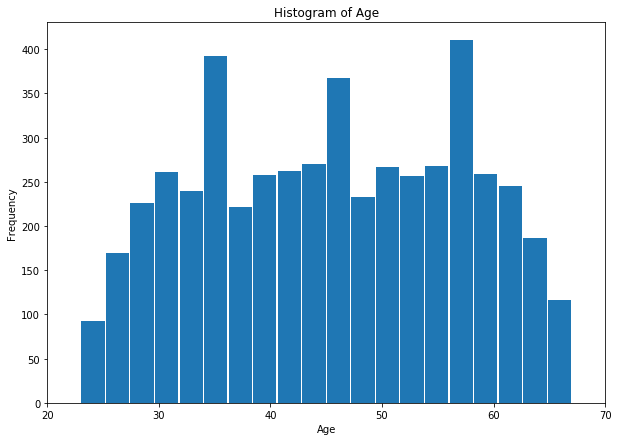

In [8]:
plt.figure(figsize=(10,7))
plt.hist(bank_data['Age'],bins=20,rwidth=0.95)
plt.xlim(20,70)
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Histogram of Age')
plt.show()

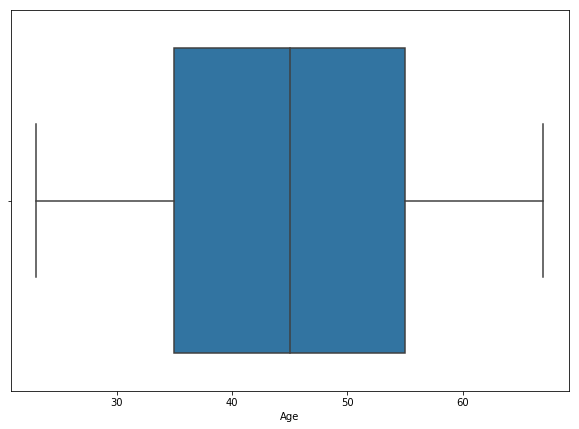

In [9]:
plt.figure(figsize=(10,7))
sns.boxplot(bank_data['Age'])
plt.show()

It can be observed that age is more or less symmetrically distributed and most of the customers fall in between the range of 30 to 60 years. There is no skewness in the distribution of age.

C:\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


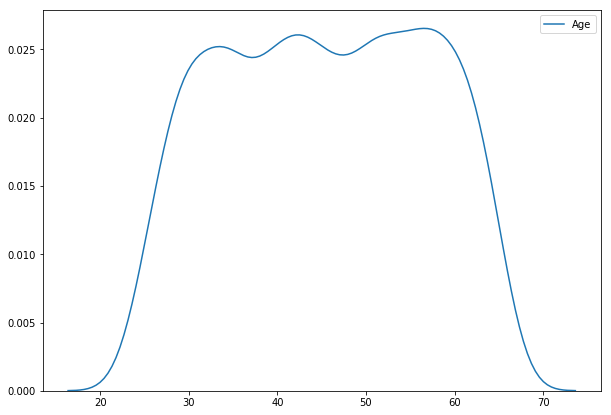

In [10]:
plt.figure(figsize=(10,7))
sns.kdeplot(bank_data['Age'])
plt.show()

We can also see that the distribution is multi-modal with 3 peaks.

#### Exploring experience

In [11]:
bank_data['Experience'].describe()

count    5000.000000
mean       20.104600
std        11.467954
min        -3.000000
25%        10.000000
50%        20.000000
75%        30.000000
max        43.000000
Name: Experience, dtype: float64

In [12]:
# The minimum value in experience is -3 which doesn't make sense as years of experience of a customer cannot be less than 0.
# We can look at how many such points exist.

In [13]:
np.sum([bank_data['Experience'] < 0])

52

In [14]:
bank_data[bank_data['Experience'] < 0]

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
89,90,25,-1,113,94303,4,2.30,3,0,0,0,0,0,1
226,227,24,-1,39,94085,2,1.70,2,0,0,0,0,0,0
315,316,24,-2,51,90630,3,0.30,3,0,0,0,0,1,0
451,452,28,-2,48,94132,2,1.75,3,89,0,0,0,1,0
524,525,24,-1,75,93014,4,0.20,1,0,0,0,0,1,0
536,537,25,-1,43,92173,3,2.40,2,176,0,0,0,1,0
540,541,25,-1,109,94010,4,2.30,3,314,0,0,0,1,0
576,577,25,-1,48,92870,3,0.30,3,0,0,0,0,0,1
583,584,24,-1,38,95045,2,1.70,2,0,0,0,0,1,0
597,598,24,-2,125,92835,2,7.20,1,0,0,1,0,0,1


In [15]:
bank_data[bank_data['Experience'] < 0].describe().T

,count,mean,std,min,25%,50%,75%,max
ID,52.0,2427.346154,1478.834118,90.0,767.25,2783.5,3669.500,4958.0
Age,52.0,24.519231,1.475159,23.0,24.00,24.0,25.000,29.0
Experience,52.0,-1.442308,0.639039,-3.0,-2.00,-1.0,-1.000,-1.0
Income,52.0,69.942308,37.955295,12.0,40.75,65.5,86.750,150.0
ZIP Code,52.0,93240.961538,1611.654806,90065.0,92167.75,93060.0,94720.000,95842.0
Family,52.0,2.865385,0.970725,1.0,2.00,3.0,4.000,4.0
CCAvg,52.0,2.129423,1.750562,0.2,1.00,1.8,2.325,7.2
Education,52.0,2.076923,0.836570,1.0,1.00,2.0,3.000,3.0
Mortgage,52.0,43.596154,90.027068,0.0,0.00,0.0,0.000,314.0
Personal Loan,52.0,0.000000,0.000000,0.0,0.00,0.0,0.000,0.0


We can see that Age group of the customers with negative years of experience is between 23 and 29 years.

The dataset also contains 52 customers with negative years of experience. As the dataset has 5000 values and only 52 have negative years of experience, we can drop these records from our dataset for analysis.

In [16]:
# Filtering out the records with Experience less than 0.
bank_data = bank_data[bank_data['Experience'] >= 0]

#### Exploring the Annual income of our customers

In [17]:
bank_data['Income'].describe()

count    4948.000000
mean       73.814470
std        46.112596
min         8.000000
25%        39.000000
50%        64.000000
75%        98.000000
max       224.000000
Name: Income, dtype: float64

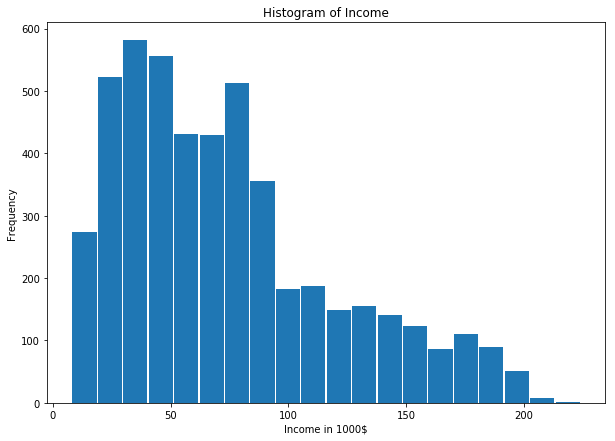

In [18]:
plt.figure(figsize=(10,7))
plt.hist(bank_data['Income'],bins=20,rwidth=0.95)
#plt.xlim(20,70)
plt.xlabel('Income in 1000$')
plt.ylabel('Frequency')
plt.title('Histogram of Income')
plt.show()

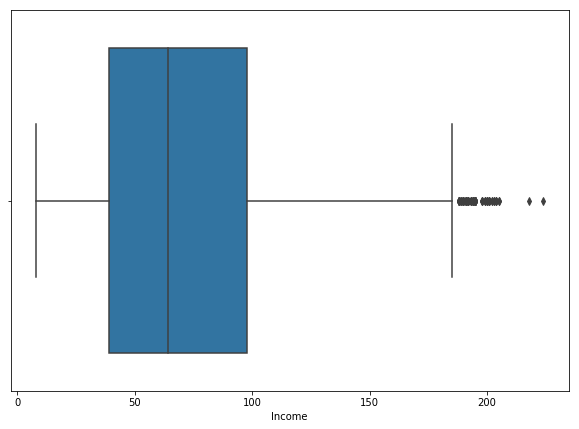

In [19]:
plt.figure(figsize=(10,7))
sns.boxplot(bank_data['Income'])
plt.show()

C:\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


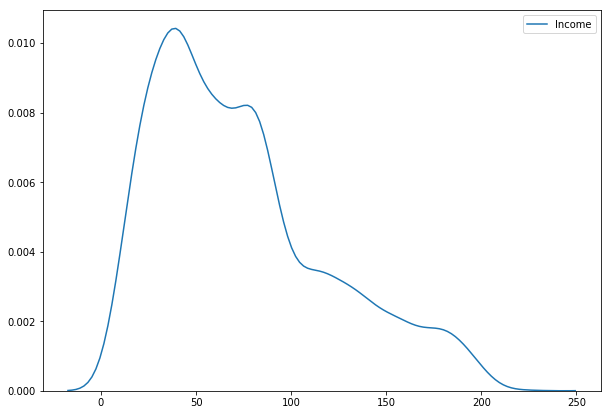

In [20]:
plt.figure(figsize=(10,7))
sns.kdeplot(bank_data['Income'])
plt.show()

The distribution of income is clearly right skewed. Most of our customers have an income in the range of approx. 15000 dollars to 10000 dollars. The boxplot also shows some outliers whose income is greater than 180000 $. These are very few records.

#### Exploring Family size

In [21]:
bank_data['Family'].describe()

count    4948.000000
mean        2.391471
std         1.148444
min         1.000000
25%         1.000000
50%         2.000000
75%         3.000000
max         4.000000
Name: Family, dtype: float64

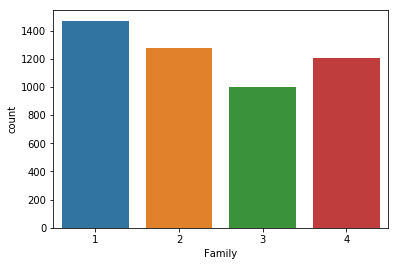

In [22]:
sns.countplot(bank_data['Family'])

It can be seen that most of our customers are single. The distribution of the various family sizes is approximately even with a family size of 3 members being the least in number.

In [23]:
pd.crosstab(columns=bank_data['Personal Loan'],index=bank_data['Family'])

Personal Loan,0,1
Family,,
1,1363,107
2,1168,106
3,868,133
4,1069,134


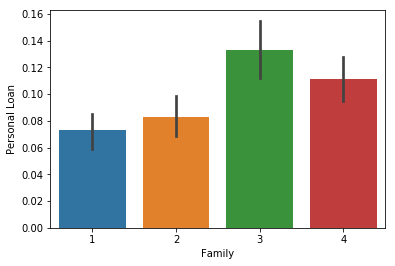

In [24]:
sns.barplot(x=bank_data['Family'],y=bank_data['Personal Loan'])

Generally we can see that people with greater family sizes have a higher number of personal loans taken.

#### Exploring education

In [25]:
bank_data['Education'].describe()

count    4948.000000
mean        1.878941
std         0.839745
min         1.000000
25%         1.000000
50%         2.000000
75%         3.000000
max         3.000000
Name: Education, dtype: float64

In [26]:
bank_data['Education'].value_counts()

1    2080
3    1481
2    1387
Name: Education, dtype: int64

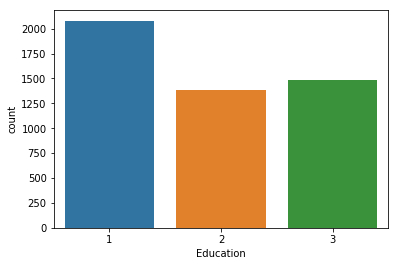

In [27]:
sns.countplot(bank_data['Education'])

It is evident that majority of our customers have undergrad education and the number of advanced degree holders is higher than that of graduates.

In [28]:
pd.crosstab(columns=bank_data['Personal Loan'],index=bank_data['Education'])

Personal Loan,0,1
Education,,
1,1987,93
2,1205,182
3,1276,205


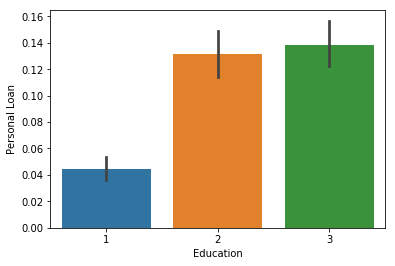

In [29]:
sns.barplot(x=bank_data['Education'],y=bank_data['Personal Loan'])

We can see that as most of the Personal loans have been taken by advanced degree holders and graduates. 

#### Exploring mortgage

In [30]:
bank_data['Mortgage'].describe()

count    4948.000000
mean       56.634398
std       101.828885
min         0.000000
25%         0.000000
50%         0.000000
75%       101.000000
max       635.000000
Name: Mortgage, dtype: float64

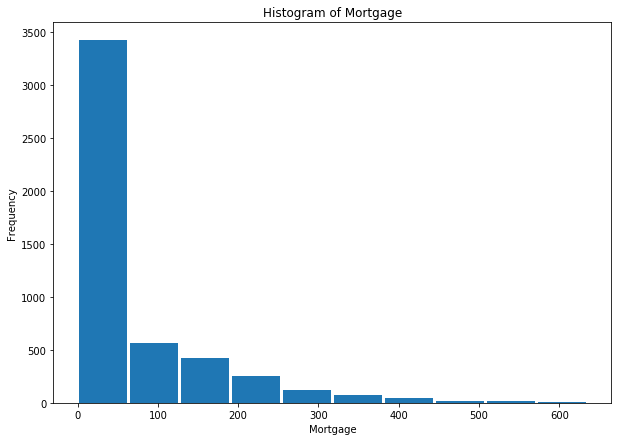

In [31]:
plt.figure(figsize=(10,7))
plt.hist(bank_data['Mortgage'],rwidth=0.95)
#plt.xlim(20,70)
plt.xlabel('Mortgage')
plt.ylabel('Frequency')
plt.title('Histogram of Mortgage')
plt.show()

The distribution of mortgage is skewed to the right and most of our customers have mortgage values less than 50000 dollars. The number of customers with house mortgage value greater than 200000 dollars is also very less.

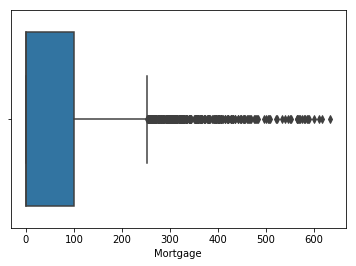

In [32]:
sns.boxplot(bank_data['Mortgage'])
plt.show()

Again the boxplot clearly indicates that the distribution is very skewed to the right.

#### Exploring Securities Account

In [33]:
bank_data['Securities Account'].describe()

count    4948.000000
mean        0.104285
std         0.305660
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: Securities Account, dtype: float64

In [34]:
bank_data['Securities Account'].value_counts()

0    4432
1     516
Name: Securities Account, dtype: int64

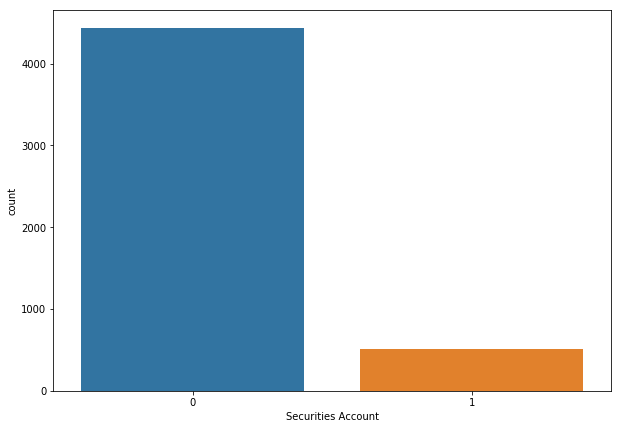

In [35]:
plt.figure(figsize=(10,7))
sns.countplot(bank_data['Securities Account'])
plt.show()

The distribution of Securities Account clearly shows that most of our customers do not have a securities account.

In [36]:
pd.crosstab(columns=bank_data['Personal Loan'],index=bank_data['Securities Account'])

Personal Loan,0,1
Securities Account,,
0,4012,420
1,456,60


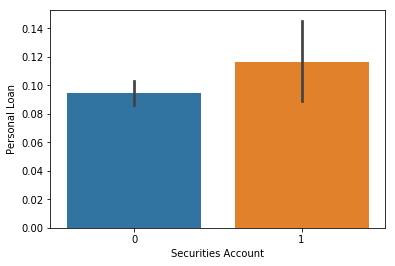

In [37]:
sns.barplot(x=bank_data['Securities Account'],y=bank_data['Personal Loan'])

We can see that the probability of taking a personal loan is a little higher for a customer with a securities account.

#### Exploring CD(Certificate of Deposit) account

In [38]:
bank_data['CD Account'].describe()

count    4948.000000
mean        0.061035
std         0.239418
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: CD Account, dtype: float64

In [39]:
bank_data['CD Account'].value_counts()

0    4646
1     302
Name: CD Account, dtype: int64

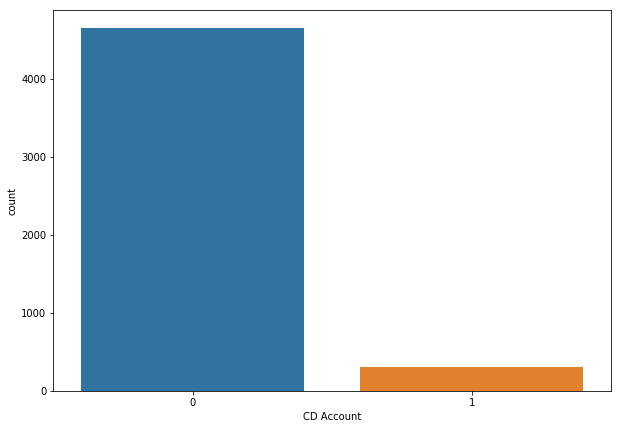

In [40]:
plt.figure(figsize=(10,7))
sns.countplot(bank_data['CD Account'])
plt.show()

Most of our customers do not have a Certificate of Deposit Account

In [41]:
pd.crosstab(index=bank_data['CD Account'],columns=bank_data['Personal Loan'])

Personal Loan,0,1
CD Account,,
0,4306,340
1,162,140


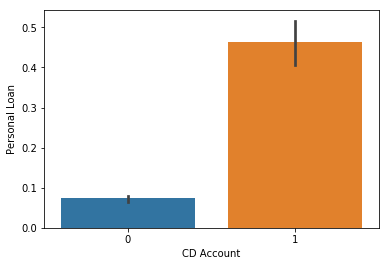

In [42]:
sns.barplot(x=bank_data['CD Account'],y=bank_data['Personal Loan'])
plt.show()

The probability of a customer to take a personal loan with a CD account is higher than a customer without a CD account.

#### Exploring Online 

In [43]:
bank_data['Online'].describe()

count    4948.000000
mean        0.597009
std         0.490549
min         0.000000
25%         0.000000
50%         1.000000
75%         1.000000
max         1.000000
Name: Online, dtype: float64

In [44]:
bank_data['Online'].value_counts()

1    2954
0    1994
Name: Online, dtype: int64

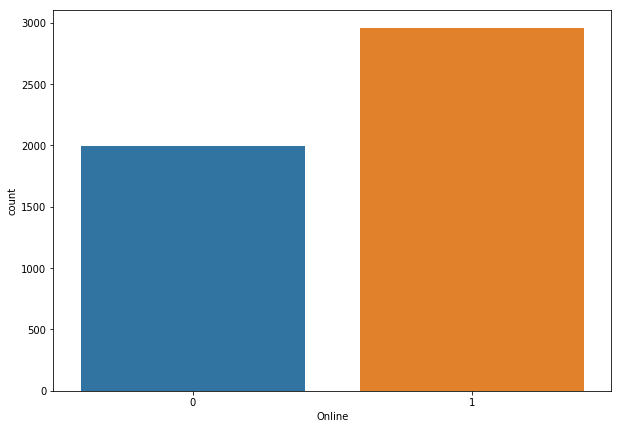

In [45]:
plt.figure(figsize=(10,7))
sns.countplot(bank_data['Online'])
plt.show()

We can see that most of our customers use online banking services.

In [46]:
pd.crosstab(index=bank_data['Online'],columns=bank_data['Personal Loan'])

Personal Loan,0,1
Online,,
0,1805,189
1,2663,291


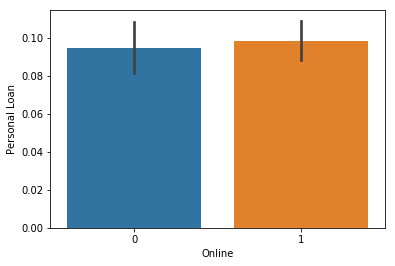

In [47]:
sns.barplot(x=bank_data['Online'],y=bank_data['Personal Loan'])
plt.show()

The probabilty of taking a loan is slightly higher for online users.

#### Exploring Credit Card

In [48]:
bank_data['CreditCard'].describe()

count    4948.000000
mean        0.294058
std         0.455664
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         1.000000
Name: CreditCard, dtype: float64

In [49]:
bank_data['CreditCard'].value_counts()

0    3493
1    1455
Name: CreditCard, dtype: int64

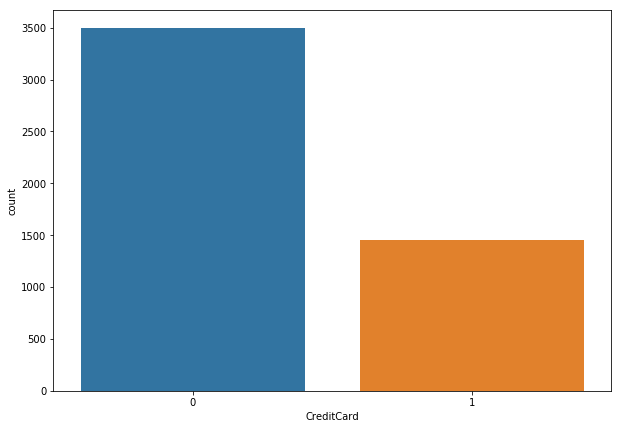

In [50]:
plt.figure(figsize=(10,7))
sns.countplot(bank_data['CreditCard'])
plt.show()

Most of our customers do not use a credit card.

In [51]:
pd.crosstab(index=bank_data['CreditCard'],columns=bank_data['Personal Loan'])

Personal Loan,0,1
CreditCard,,
0,3156,337
1,1312,143


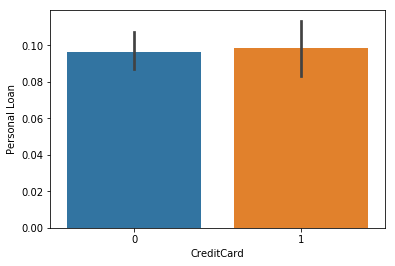

In [52]:
sns.barplot(x=bank_data['CreditCard'],y=bank_data['Personal Loan'])
plt.show()

The probability of a person taking a loan if he has a credit card is almost the same as if the person does not have a credit card.

#### Exploring the target column Personal loan

In [53]:
bank_data['Personal Loan'].value_counts()

0    4468
1     480
Name: Personal Loan, dtype: int64

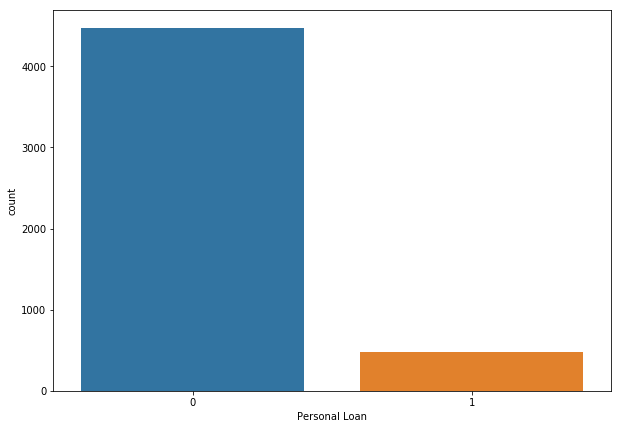

In [54]:
plt.figure(figsize=(10,7))
sns.countplot(bank_data['Personal Loan'])

#### It can be seen that the distribution of Our target column is imbalanced. Imbalanced datasets can lead to the creation of biased models. The models trained on imbalanced datsets get overtrained on the majority class and can lead to biased predictions. So we can oversample the dataset to balance the classes.

#### Synthetic Minority Oversampling Technique (SMOTE) is an oversampling technique which creates new data points artifically to increase the number of minority class data points.

In [55]:
from imblearn.over_sampling import SMOTE

C:\Anaconda3\lib\site-packages\sklearn\externals\six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)


In [56]:
#Separating the predictors and Targets
X = bank_data.drop(labels=['Personal Loan','ID'],axis=1)
y = bank_data['Personal Loan']

#### Separating the dataset into train and test sets with 70% for training and 30% for testing.

In [57]:
from sklearn.model_selection import train_test_split

In [58]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

#### We can oversample the training data so that the model learns from balanced data. But the test set represents unseen data which the model might not have seen before and would be imbalanced. We want our model to perform well on imbalanced datasets as well. So we do not oversample the test data.

In [59]:
oversample = SMOTE()
X_train,y_train = oversample.fit_resample(X_train,y_train)

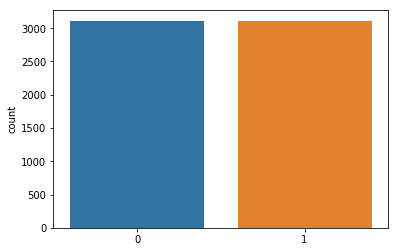

In [60]:
sns.countplot(y_train)

Now the dataset is balanced for training.

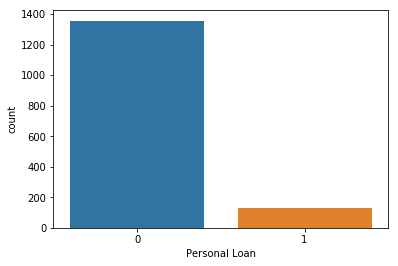

In [61]:
#Distribution of the target class in the test data.
sns.countplot(y_test)

### Creating various predicitve models

#### Logistic regression model

In [62]:
from sklearn.linear_model import LogisticRegression

In [63]:
model = LogisticRegression(C=100)

In [64]:
model.fit(X_train,y_train)

C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=100, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [65]:
pred = model.predict(X_test)

In [66]:
# Importing confusion matrix and classification report
from sklearn.metrics import confusion_matrix,classification_report

In [67]:
pd.DataFrame(confusion_matrix(y_test,pred),index=['Actual 0','Actual 1'],columns=['Predicted 0','Predicted 1'])

,Predicted 0,Predicted 1
Actual 0,1239,117
Actual 1,18,111


In [68]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.99      0.91      0.95      1356
           1       0.49      0.86      0.62       129

    accuracy                           0.91      1485
   macro avg       0.74      0.89      0.79      1485
weighted avg       0.94      0.91      0.92      1485



#### We can also look at the ROC and AUC score to look at the distinguishing ability of the model. A model with a higher AUC score has better ability to distinguish between the 2 classes.

In [69]:
from sklearn.metrics import roc_auc_score

In [70]:
print(roc_auc_score(y_test,pred))

0.887090965219181


For the given dataset we can see that the Logistic Regression model performs well and achieves an overall accuracy of 91% with a 91% recall for the 0 class and a 85% of recall for the 1 class.

#### Support Vector Machine

In [71]:
from sklearn.svm import SVC

In [72]:
model = SVC(kernel='linear')

In [73]:
model.fit(X_train,y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [74]:
pred = model.predict(X_test)

In [75]:
pd.DataFrame(confusion_matrix(y_test,pred),index=['Actual 0','Actual 1'],columns=['Predicted 0','Predicted 1'])

,Predicted 0,Predicted 1
Actual 0,1169,187
Actual 1,16,113


In [76]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.99      0.86      0.92      1356
           1       0.38      0.88      0.53       129

    accuracy                           0.86      1485
   macro avg       0.68      0.87      0.72      1485
weighted avg       0.93      0.86      0.89      1485



In [77]:
print(roc_auc_score(y_test,pred))

0.869031693764149


The Support Vector Machine with a linear kernel results in a model with an accuracy of 86%. The recall values for both the classes are high. But the precision for class 0 is low. The ROC-AUC score is also lower for SVM when compared to logistic regression. We can say that Logistic regression generalizes better than SVM. SVM model has a higher variance and might have overfit the data.

#### K-Nearest Neighbors Classification

In [78]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler

#### As KNN works based on distance formula we have to standardize the data before using them in the model. The different variables are measured on different scales and calculating the distance between variables of different scales of measurement might be misleading. Standardization brings all the variables to the same scale.

In [79]:
scaler = StandardScaler()
scaler.fit(X_train)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [80]:
model = KNeighborsClassifier()

In [81]:
model.fit(scaler.fit_transform(X_train),y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [82]:
pred = model.predict(scaler.fit_transform(X_test))

In [83]:
pd.DataFrame(confusion_matrix(y_test,pred),index=['Actual 0','Actual 1'],columns=['Predicted 0','Predicted 1'])

,Predicted 0,Predicted 1
Actual 0,1074,282
Actual 1,2,127


In [84]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       1.00      0.79      0.88      1356
           1       0.31      0.98      0.47       129

    accuracy                           0.81      1485
   macro avg       0.65      0.89      0.68      1485
weighted avg       0.94      0.81      0.85      1485



In [85]:
print(roc_auc_score(y_test,pred))

0.8882657611305481


The KNN model with K=5 is able to achieve an accuracy score of 81%. The best aspect of this model is that it is able to almost predict all of the loan applicants successfully. But the recall of non applicants is low and the precision is also low for class 1.

#### Naive Bayes 

In [86]:
from sklearn.naive_bayes import GaussianNB

In [87]:
model = GaussianNB()

In [88]:
model.fit(X_train,y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [89]:
pred = model.predict(X_test)

In [90]:
pd.DataFrame(confusion_matrix(y_test,pred),index=['Actual 0','Actual 1'],columns=['Predicted 0','Predicted 1'])

,Predicted 0,Predicted 1
Actual 0,1221,135
Actual 1,24,105


In [91]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.98      0.90      0.94      1356
           1       0.44      0.81      0.57       129

    accuracy                           0.89      1485
   macro avg       0.71      0.86      0.75      1485
weighted avg       0.93      0.89      0.91      1485



In [92]:
print(roc_auc_score(y_test,pred))

0.8571979831240997


The Naive Bayes model achieved an overall accuracy of 89%. The sensitivity (True Positive Rate) -  Recall of class 1 and Specificity (True Negative Rate) - Recall of Class 0 are 90% and 81% respectively. Naive bayes provides a balanced classification with good performance on both classes. However, we are interested in reducing the number of False positives, ie. the number of people who did not actually apply for a loan but predicted as applied. The management wants to identify all the liable customers and develop a campaign targeted at the people who will not apply for loans. 

#### Decision Tree

In [93]:
from sklearn.tree import DecisionTreeClassifier

In [94]:
model = DecisionTreeClassifier()

In [95]:
model.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [96]:
pred = model.predict(X_test)

In [97]:
pd.DataFrame(confusion_matrix(y_test,pred),index=['Actual 0','Actual 1'],columns=['Predicted 0','Predicted 1'])

,Predicted 0,Predicted 1
Actual 0,1339,17
Actual 1,13,116


In [98]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1356
           1       0.87      0.90      0.89       129

    accuracy                           0.98      1485
   macro avg       0.93      0.94      0.94      1485
weighted avg       0.98      0.98      0.98      1485



In [99]:
print(roc_auc_score(y_test,pred))

0.9433439665226041


In [100]:
#Importance of Input Variables
pd.DataFrame(data=model.feature_importances_,index=X.columns,columns=['Importance']).sort_values(ascending=False,by='Importance')

,Importance
Income,0.643846
Education,0.188268
Family,0.066369
CCAvg,0.064815
CD Account,0.018075
Age,0.004622
Experience,0.004462
Online,0.003388
ZIP Code,0.003064
Mortgage,0.001979


Decision tree is a very flexible model and is able to capture non-linear patterns in the data. Decision trees have a lot of variance and can cause overfitting. In our case, the model produces good results with an overall accuracy of 98% and good sensitiity and specificity values on the test data. The number of False positives is also very low in this model and can be considered a good fit for our problem. Income and education seem to be the most important factors in determining whether the customer will apply for a loan or not. AN ROC-AUC score of 92% also suggests that the model has good distinguishing ability.

#### Random Forest Classification

In [101]:
from sklearn.ensemble import RandomForestClassifier

In [102]:
model = RandomForestClassifier(n_estimators=500)

In [103]:
model.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=500,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [104]:
pred = model.predict(X_test)

In [105]:
pd.DataFrame(confusion_matrix(y_test,pred),index=['Actual 0','Actual 1'],columns=['Predicted 0','Predicted 1'])

,Predicted 0,Predicted 1
Actual 0,1350,6
Actual 1,17,112


In [106]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      1356
           1       0.95      0.87      0.91       129

    accuracy                           0.98      1485
   macro avg       0.97      0.93      0.95      1485
weighted avg       0.98      0.98      0.98      1485



In [107]:
print(roc_auc_score(y_test,pred))

0.931896137751252


In [108]:
#Importance of Input Variables
pd.DataFrame(data=model.feature_importances_,index=X.columns,columns=['Importance']).sort_values(ascending=False,by='Importance')

,Importance
Income,0.409676
CCAvg,0.175323
Education,0.147386
CD Account,0.094282
Family,0.066216
Online,0.027007
CreditCard,0.018454
Mortgage,0.018349
ZIP Code,0.014107
Age,0.011796


Random Forests reduce the variance in the model by aggregating the outputs of multiple trees. Aggregation of data results in a decrease in variance. The models are bulit using trees built from random subsets of predictors at each split and data obtained by bootstrapping the training dataset by sampling with replacement. Decision trees are affected by outliers as well. Random forests give a better generalized performance.
Income, CCAvg and Education are the important factors affecting loan application. The number of False positives is also very less for a model built with 500 trees. This model can be considered as the best model for our problem.

#### Xtreme Gradient Boosting

In [109]:
import xgboost as xgb

In [110]:
model = xgb.XGBClassifier()

In [111]:
model.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1,
              objective='binary:logistic', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [112]:
pred = model.predict(X_test,validate_features=False)

In [113]:
pd.DataFrame(confusion_matrix(y_test,pred),index=['Actual 0','Actual 1'],columns=['Predicted 0','Predicted 1'])

,Predicted 0,Predicted 1
Actual 0,1353,3
Actual 1,18,111


In [114]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      1356
           1       0.97      0.86      0.91       129

    accuracy                           0.99      1485
   macro avg       0.98      0.93      0.95      1485
weighted avg       0.99      0.99      0.99      1485



In [115]:
print(roc_auc_score(y_test,pred))

0.9291263634492695


Xgboost is another ensemble learning which works by training multiple weak learners sequentially and focuses on the errors of the previous learner to reduce it further. It is a flexible algorithm which works on non-linear data patterns as well. In our problem we have to identify all the people who will not apply for the loan and target them during the next campaign. The ROC-AUC score, the sensistivity and specificity scores are also very high for the gradient boosted model. With further tuning we can even improve the performance of the model. For our business problem we can use XGB classifier as it performs the best. Random Forest is also very good but Xgboost has a lower number of False postitives.